<a href="https://colab.research.google.com/github/c-vision/Crypto-Signal/blob/master/neuralprophet_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install neuralprophet
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      

In [2]:
from neuralprophet import NeuralProphet
import pandas as pd
import pandas_datareader as pdr
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [3]:
end_date = datetime.date.today()
start_date = end_date-relativedelta(days=2500)
ticker = 'SPY'
forecast_days_ahead = 50

In [4]:
df = pdr.data.get_data_yahoo(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
df = df.reset_index()
df = pd.DataFrame(df, columns = ["Date","Close"])
df.rename(columns = {"Date":"ds"}, inplace = True)
df.rename(columns = {"Close":"y"}, inplace = True)

In [6]:
# Fire up the Neural Prohet engine
m = NeuralProphet()
metrics = m.fit(df)
future = m.make_future_dataframe(df=df, periods=forecast_days_ahead)
df_no_weekends = future[future['ds'].dt.dayofweek < 5]    
forecast = m.predict(df=df_no_weekends)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 165
INFO:NP.config:Auto-set epochs to 165
WARNING - (py.warnings._showwarn

Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.0% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.0% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 54it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


Text(0, 0.5, 'Closing Price')

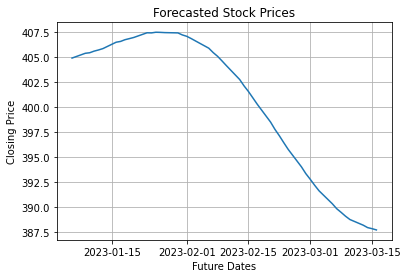

In [7]:
# Plot the forecasted stock prices
plt.plot(forecast['ds'],forecast['yhat1'])
plt.rcParams['figure.figsize'] = [16, 8]         
plt.grid()
plt.title("Forecasted Stock Prices")
plt.xlabel("Future Dates")
plt.ylabel("Closing Price")